# Air pollution related to Harvey hurricane 
## 1. Aim and objectives
![title](img/texas_port.jpg)
<center>PHOTO: U.S. Coast Guard District 8</center>


According to the __[Hurricane Harvey report](https://www.nhc.noaa.gov/data/tcr/AL092017_Harvey.pdf)__ (AL092017) from the US National Hurricane Center, hurricane Harvey is the second-most costly hurricane in U.S. history, after accounting for inflation, behind only Katrina (2005). 
It made landfall along the middle Texas coast on 26 August 2017. "The storm then stalled, with its center over or near the Texas coast for four days, dropping historic amounts of rainfall of more than 60 inches over southeastern Texas. These rains caused catastrophic flooding. [...] At least 68 people died from the direct effects of the storm in Texas, the largest number of direct deaths from a tropical cyclone in that state since 1919."

The path of Harvey between 24 and 28 august 2017 can be watched on __[this video from NOAASatellites](https://www.youtube.com/watch?v=pnTN6b1QoL8)__.

Texas is home to a large petrochemical industry, and numerous facilities such as factories and refineries were impacted by hurricane Harvey. Facilities needed to be shut down before Harvey made landfall. Stopping and starting of plants, as well as chemical spills and damage to petroleum tanks released air pollution. BuzzFeed News extracted __[data](https://github.com/BuzzFeedNews/2017-09-harvey-emissions-update)__ from emissions reports submitted by industrial facilities to the Texas Commission on Environmental Quality (TCEQ)'s Air Emission Event Reporting Database.

Our aim is to analyse and visualise the impact of hurricane Harvey on the Harvey-related air pollution released by chemical plants in Texas .

Our objectives is to:
1. Understand the data available
2. Build visualisations that help quickly grab the findings 
3. Present the results and what could be further addressed.

The source of data is the __[BuzzFeed News github page](https://github.com/BuzzFeedNews/2017-09-harvey-emissions-update)__. This supports __[BuzzFeed News' reporting on Harvey-related industrial emissions in Texas](https://www.buzzfeednews.com/article/nidhisubbaraman/tropical-storm-harvey-emissions-pollution)__.

This dataset deals with chemical plants located in Texas, USA. There are 48 facilities, located in 10 counties. 1455 air emissions are characterised as follows: 

| Designation | Attribute | Unit | Value for example |
| --- | --- |
| report_id | TCEQ report number | N/A | 266261|
| Event began | Date and time of event start | date | 2017-08-27 00:00:00 |
| Event ended | Date and time of event stop | date | 2017-09-06 00:00:00 |
| Regulated entity RN number | TCEQ entity number | N/A | RN103919817 |
| Regulated entity name | Facility name | N/A |CHEVRON PHILLIPS CHEMICAL CEDAR BAYOU PLANT |
| Type(s) of air emissions event | "AIR SHUTDOWN", "AIR STARTUP", or "EMISSIONS EVENT" | N/A | AIR SHUTDOWN	 |
| County | Name of the county where the facility is located | N/A | HARRIS|
| contaminant | Name of the contaminant | N/A | Carbon Monoxide|
| authorization | Permit reference | N/A | 1504A|
| limit | Maximal quantity authorized to be released | - | 1892.04 LBS/HR|
| quantity | quantity of emitted polluant | pounds | 244040.0|
| units | units used to report emitted quantities | N/A | lbs (est.)|

# 2. Exploratory data analysis

In [26]:
# import libraries
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff


import numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# display the plotly plots inside the Jupyter notebook
pyo.init_notebook_mode(connected=True)

In [2]:
# load data
path = "/Users/linetonthat/ds_training/projects/2019-06_Harvey_pollution/3_treated_data/"
df = pd.read_csv(path+"largest-emissions-in-lbs.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 12 columns):
report_id                         1455 non-null int64
Event began                       1455 non-null object
Event ended                       1453 non-null object
Regulated entity RN number        1455 non-null object
Regulated entity name             1455 non-null object
Type(s) of air emissions event    1455 non-null object
County                            1455 non-null object
contaminant                       1455 non-null object
authorization                     1437 non-null object
limit                             1455 non-null object
quantity                          1455 non-null float64
units                             1455 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 136.5+ KB


There are 2 emissions where the date of event end is not reported.

In [5]:
df[df['Event ended'].isnull()].head()

,report_id,Event began,Event ended,Regulated entity RN number,Regulated entity name,Type(s) of air emissions event,County,contaminant,authorization,limit,quantity,units
84,267266,2017-09-08 08:00:00,NaN,RN100217389,FLINT HILLS RESOURCES PORT ARTHUR FACILITY,AIR STARTUP,JEFFERSON,"1,3-BUTADIENE",NaN,0.0,14000.0,lbs
503,267293,2017-09-01 10:30:00,NaN,RN104964267,TPC GROUP PORT NECHES OPERATIONS,EMISSIONS EVENT,JEFFERSON,CO,NaN,84.05 LBS/HR,1000.0,lbs


No date for the event end were provided in the reports scraped on the Air Emission Event Report Database (Date mentionned is: 12/31/3000). Also tried directly on the __[TCEQ website](https://www.tceq.texas.gov/airquality/emission-events)__, but the link to the  Air Emission Event Report Database was not working from my country.
## Events

In [10]:
# Type of events
df['Type(s) of air emissions event'].value_counts()

EMISSIONS EVENT    855
AIR STARTUP        341
AIR SHUTDOWN       259
Name: Type(s) of air emissions event, dtype: int64

This confirms that 3 types of events were extracted from the reports.

In [12]:
# format data
df["Event began"] = pd.to_datetime(df["Event began"])
df["Event ended"] = pd.to_datetime(df["Event ended"], errors="coerce")

In [13]:
# assess event duration
df['duration'] = df["Event ended"]  - df["Event began"]

In [14]:
# convert into number of days 
df['duration'] = df['duration']/ np.timedelta64(1,'D')
df['duration'].describe()

count    1453.000000
mean        6.214596
std         6.908148
min         0.001389
25%         1.166667
50%         4.166667
75%        10.000000
max        30.000000
Name: duration, dtype: float64

Text(0.5, 0, 'Duration of event (days)')

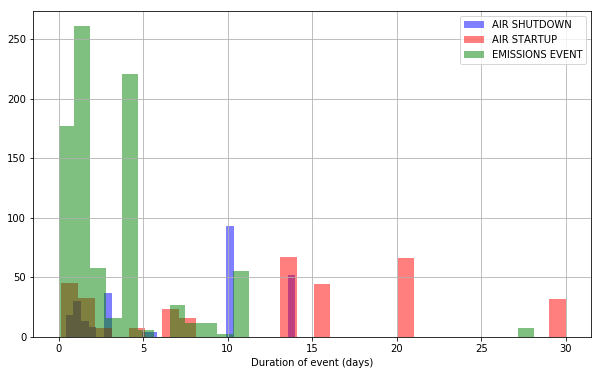

In [19]:
# plot the distribution of event duration according to the type of event (static)
plt.figure(figsize=(10,6))
df[df['Type(s) of air emissions event'] == 'AIR SHUTDOWN']['duration'].dropna().hist(alpha=0.5,color='blue', bins=30,label='AIR SHUTDOWN')
df[df['Type(s) of air emissions event'] == 'AIR STARTUP']['duration'].dropna().hist(alpha=0.5,color='red', bins=30,label='AIR STARTUP')
df[df['Type(s) of air emissions event'] == 'EMISSIONS EVENT']['duration'].dropna().hist(alpha=0.5,color='green', bins=30,label='EMISSIONS EVENT')
plt.legend()
plt.xlabel('Duration of event (days)')

In [31]:
# plot the distribution of event duration according to the type of event (interactive)
hist_data = [df[df['Type(s) of air emissions event'] == 'AIR SHUTDOWN']['duration'].dropna(),
            df[df['Type(s) of air emissions event'] == 'AIR STARTUP']['duration'].dropna(),
            df[df['Type(s) of air emissions event'] == 'EMISSIONS EVENT']['duration'].dropna()]

group_labels = ['AIR SHUTDOWN', 'AIR STARTUP', 'EMISSIONS EVENT']
colors = ['#7FA6EE', '#B8F7D4', '#835AF1']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, colors=colors, show_curve=False)

# Add title
fig['layout'].update(title='Distribution of event duration by type of event')

# Plot!
pyo.iplot(fig)

From the histograms on event duration, we observe the following:
* Most emissions events last 5 days or less. 30% of this type of event last 1 day or less.
* More than 55% of air shutdown last between 9 and 15 days, while the rest has a duration of less than 7 days.
* For the duration of air startup, approximately one third of events is observed each following range: Less than 10 days, between 10 and 20 days, and between 10 and 30 days.

In [16]:
# Assess the period of events reported and selected
df['Event began'].min() 

Timestamp('2017-08-24 06:40:00')

In [17]:
df['Event ended'].max() 

Timestamp('2017-10-01 05:00:00')

Reported events related to hurricane Harvey occur between 24 August 2017 and 1st October 2017.

## Location

In [32]:
# List the counties where the facilities are located
df['County'].unique()

array(['HARRIS', 'JEFFERSON', 'NUECES', 'BRAZORIA', 'GALVESTON', 'CALHOUN',
       'WASHINGTON', 'CHAMBERS', 'DEWITT', 'GRIMES'], dtype=object)

In [54]:
# Count the number of facilities in each county
df.groupby(by=['County', 'Regulated entity name']).size().groupby(by=['County']).size()

County
BRAZORIA       5
CALHOUN        2
CHAMBERS       2
DEWITT         1
GALVESTON      2
GRIMES         1
HARRIS        15
JEFFERSON     10
NUECES         9
WASHINGTON     1
dtype: int64

In order to visualise the locations of the facilities, we build a map where we locate the 10 counties from Texas and the corresponding number of facilities. Based on the article published by the __[Los Angeles Times](https://www.latimes.com/nation/la-na-hurricane-harvey-explained-20170825-htmlstory.html)__ to explain Harvey hurricane, we retrieve its path. We add this path over our previous map to get an overview of our facilities location and path of the center of the hurricane.
![title](img/counties_impacted.png)

## Contaminants

In [55]:
# Count number of contaminant designations
df['contaminant'].nunique()

161

In [11]:
# List contaminants emitted
df['contaminant'].unique()

array(['Carbon Monoxide', 'Ethylene (gaseous)', 'Sulfur dioxide', 'VOC',
       'Ethylene (liquid)', 'Propylene', 'Particulate Matter', 'Butane',
       'Propane', 'NOX', 'Benzene', 'VOC (unspeciated)',
       'Propylene (Propene)', 'Nitrogen oxide', 'Isopentane',
       'Nitrogen Oxides (NOx)', 'Pentanes', 'Butanes', 'Methane',
       'Methyl tert-butyl ether', '1,3-BUTADIENE', 'CO',
       'VOC( unspeciated)', 'Hexanes', 'Toluene', 'Butene',
       'Mineral Spirit', 'C5+ (not including benzene)',
       'Butenes, All Isomers', 'Isobutane', 'Hexane, n', '2-methylpentane',
       'PM10', 'Ethane', 'Nitrogen Oxides', 'Pentene', 'NATURAL GAS',
       'Ethylene', 'Xylene (mixed isomers)', 'Pentane', 'Hexane',
       'Heptane,-n', 'Hexene', 'Dodecene', 'Butane, i', 'Butane, N-',
       '2-methylbutene-2', 'VOCs', 'Octene', 'Nitric oxide',
       'Nitrogen dioxide', 'n-butane', 'Hydrogen', 'Unspeciated VOCs',
       'Cis-2-butene', 'Trimethylbenzene, 1,2,4-', 'Isobutylene',
       'tert-but

In this list, several contaminants have different designations, such as:
* Naphta and Naphtalene
* Unspeciated VOCs and VOcs (Unspeciated)
* Ethylbenzene and ethyl benzene
* PM and Particulate Matter
* Oxides of Nitrogen (NOx) , NOX, Nitrogen Oxides
* either the chemical formula or the name: eg. H2S or Hydrogen Sulfide

-> The designation needs to be made more consistent before further analysis by contaminant.

Also, there is no classification for these contaminants, while their number is high (we guess even after making their designation consistent). We could classify them into the following categories for example: Carbon Monoxide, Sulfur Dioxide, Carbon Dioxide, Volatile Organic Compounds (VOCs), Particulates, Nitrogen Oxides, Ozone, Chlorofluorocarbons, Unburned Hydrocarbons and Lead and Heavy metals.